In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Primeiro, abrimos o DataSet que será análisado

In [2]:
cityGlobalTemp = pd.read_csv("D:\Rodrigo.Faria\Documentos\MyLab\Temperatura Global\GlobalLandTemperaturesByCountry.csv")

Informações do Dataset:

Nome Climate Change: Earth Surface Temperature Data
(Exploring global temperatures since 1750)

Criador: http://berkeleyearth.org/archive/about/

Extraido de: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

Resumo: Os dados presentes formam informações de temperaturas médias mensais de vários países do mundo, desde o ano 1743.

**Legenda:**

**dt**: Dia da coleta do dado

**AverageTemperature**: Temperatura média

**AverageTemperatureUncertainty**:o intervalo de confiança de 95% em torno da média

**Country**: País


*Objetivo: Ter insights sob as temperaturas anuais do Brasil*

In [3]:
cityGlobalTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Como queremos análisar as informações em **anos**, devemos retirar os dias e os meses, para facilitar nossa manipulação dos dados

In [4]:
#Adicionando a coluna 'dt' a uma variável
colum = cityGlobalTemp['dt']

In [5]:
#Deixando apenas os 4 primeiros digitos de cada linha em 'dt', pois são eles que correspondem ao ano
ano = colum.str.extract('(\d{4})', expand = False )

In [6]:
#Adicionando a variável ano no dataframe original através da função pd.to_numeric()
cityGlobalTemp['dt'] = pd.to_numeric(ano)

In [7]:
#print da cabeça do dataframe original atualizado
cityGlobalTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
1,1743,NaN,NaN,Åland
2,1744,NaN,NaN,Åland
3,1744,NaN,NaN,Åland
4,1744,NaN,NaN,Åland


Percebe-se que há colunas a qual estão sem preenchimento válido, isto é, estão compostas por NaN (Not a Number). Isso pode atrapalhar uma análise de dados, e por isso, devemos trata-los.
No caso desta análise, não faz sentido preenchermos esses campos. Por tanto, iremos identificar quantas linhas possuem NaN, e iremos remove-las.

In [8]:
#Usando a função isnull() para detectar os campos que têm NaN e, com isso, aplicando sum(),
#para obtermos os somatórios desses campos
cityGlobalTemp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [9]:
#Usando a função dropna() para remover os valores nulos (NaN), e atribuir isso a um novo objeto.
attCityGlobalTemp = cityGlobalTemp.dropna()

In [10]:
#Checando se o valores foram removidos
attCityGlobalTemp.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [11]:
#Agora temos um Dataframe composto somente por linhas preenchidas.
attCityGlobalTemp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
5,1744,1.530,4.680,Åland
6,1744,6.702,1.789,Åland
7,1744,11.609,1.577,Åland
8,1744,15.342,1.410,Åland
...,...,...,...,...
577456,2013,21.142,0.495,Zimbabwe
577457,2013,19.059,1.022,Zimbabwe
577458,2013,17.613,0.473,Zimbabwe
577459,2013,17.000,0.453,Zimbabwe


Agora inicaremos um processo de análise mais preciso, onde iremos focar nossa análise no Brasil.

In [12]:
#Os dados de intervalo de confiança não nos interessa mais aqui, portanto irei filtrar as colunas que quero utilizar e coloca-las em um novo dataset
corteCityGlobalTemp = attCityGlobalTemp.filter(items= ['dt' , 'AverageTemperature', 'Country'])

In [13]:
corteCityGlobalTemp.head()

,dt,AverageTemperature,Country
0,1743,4.384,Åland
5,1744,1.530,Åland
6,1744,6.702,Åland
7,1744,11.609,Åland
8,1744,15.342,Åland


In [14]:
#Agora, usaremos a coluna 'Country' para ser o nosso indice 
corteCityGlobalTemp.set_index('Country', inplace=True)
corteCityGlobalTemp

,dt,AverageTemperature
Country,,
Åland,1743,4.384
Åland,1744,1.530
Åland,1744,6.702
Åland,1744,11.609
Åland,1744,15.342
...,...,...
Zimbabwe,2013,21.142
Zimbabwe,2013,19.059
Zimbabwe,2013,17.613


In [15]:
#Para análisarmos SOMENTE a situação do Brasil, usaremos a função .loc[]
BrazilTemp = corteCityGlobalTemp.loc['Brazil']
BrazilTemp

,dt,AverageTemperature
Country,,
Brazil,1832,24.935
Brazil,1832,24.505
Brazil,1832,24.617
Brazil,1832,23.990
Brazil,1832,23.124
...,...,...
Brazil,2013,25.464
Brazil,2013,24.906
Brazil,2013,24.788


In [16]:
#Agora basta tirar a médias dos anos, utilizando a função .groupby(), para agrupar de acordo com as datas, e tirar a média das informações presentes em 'AverageTemperature'
Brazilmeantemp = BrazilTemp.groupby(['dt'])['AverageTemperature'].mean()
Brazilmeantemp

dt
1832    23.858583
1833    24.517833
1834    24.346750
1835    23.537500
1836    23.921167
          ...    
2009    25.600583
2010    25.812417
2011    25.428917
2012    25.717083
2013    25.348125
Name: AverageTemperature, Length: 181, dtype: float64

Text(0, 0.5, 'Temperatura °C')

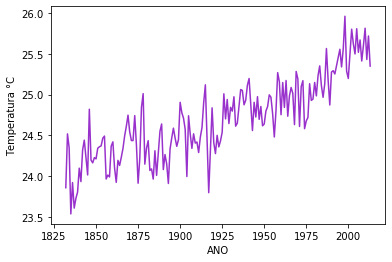

In [27]:
#Por ultimo, iremos plotar grafico com as médias anuais das temperaturas brasileiras.
Brazilmeantemp.plot(color='darkorchid')
plt.xlabel('ANO')
plt.ylabel('Temperatura °C')

Ao plotar o gráfico, temos uma possíbilidade de ter uma análise mais precisa e visual. E observando seu comportamento, podemos concluír que:
1. A média de temperatura no Brasil aumentou em 2°C desde 1832;
2. Após o inicio do século XX, as teperaturas variaram menos, e tiveram altas expressivas.